In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split

import itertools


In [2]:
DEFAULT_LENGTH_Value = 60

In [3]:


# key : value
# uniq_id : [60 values, label]

In [8]:
list_labels = [i[2] for i in global_data.values()]
distrib = dict((x,list_labels.count(x)) for x in set(list_labels))
distrib

{'youtube': 10512,
 'twitch': 40181,
 'messenger': 89526,
 'noise': 8808,
 'skype': 161624}

In [116]:
labels_glob

array(['messenger', 'messenger', 'messenger', ..., 'youtube', 'youtube',
       'youtube'], dtype='<U9')

In [119]:

labels_glob = np.array(list_labels)
import sklearn.preprocessing
import numpy as np
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_one_hot_encoded = label_binarizer.fit_transform(labels_glob)

label_one_hot_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [120]:
TBS_values = np.array([np.transpose([i[0].values,i[1].values]) for i in  global_data.values()])
TBS_values.shape

(310651, 60, 2)

In [121]:
X_train_val, X_test, y_train_val, y_test = train_test_split(TBS_values, label_one_hot_encoded, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [122]:
#images_train, _ = tuple(zip(*train))
#images_train = np.concatenate(images_train)
#images_train.shape

In [184]:
train_labels_not_encoded = label_binarizer.inverse_transform(y_train)
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(train_labels_not_encoded), y =train_labels_not_encoded)
class_weights = dict(zip(np.unique(np.argmax(y_train,axis=1)), class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(train_labels_not_encoded),
                                                               y =train_labels_not_encoded)))

layer_normalization = tf.keras.layers.Normalization(axis=None, input_shape=(length_values,2))
layer_normalization.adapt(X_train)


In [185]:
a

{0: 0.6930966598858193,
 1: 7.015675855197609,
 2: 0.38506001695239656,
 3: 1.5437716958380532,
 4: 5.885817776539426}

In [186]:
class_weights

{0: 0.6930966598858193,
 1: 7.015675855197609,
 2: 0.38506001695239656,
 3: 1.5437716958380532,
 4: 5.885817776539426}

In [187]:
#X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [193]:
model = Sequential()
model.add(layer_normalization)
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D()) #Adding a convultion layer

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D()) #

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(distrib.keys()), activation='sigmoid'))




In [194]:
#Conv 1 : output_shape= (None, length_values-5+1,32)    (None, 56,32)
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 60, 2)            3         
 ion)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 56, 32)            352       
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 28, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 24, 64)            10304     
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                     

In [196]:

checkpoint_filepath = '/tmp/checkpoint/best_model'
logs_dir = 'tmp/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy',  mode='max',save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(X_train,y_train, epochs =20, 
                 validation_data = (X_val,y_val),
                 callbacks =[tensorboard_callback, early_stop,model_checkpoint_callback],
                class_weight=class_weights
                )

model.load_weights(checkpoint_filepath)

Epoch 1/20
6602/6602 [==============================] - 62s 9ms/step - loss: 0.1597 - accuracy: 0.7674 - val_loss: 0.1714 - val_accuracy: 0.7925
Epoch 2/20
6602/6602 [==============================] - 67s 10ms/step - loss: 0.1370 - accuracy: 0.7834 - val_loss: 0.1704 - val_accuracy: 0.8044
Epoch 3/20
6602/6602 [==============================] - 62s 9ms/step - loss: 0.1232 - accuracy: 0.7944 - val_loss: 0.1668 - val_accuracy: 0.8065
Epoch 4/20
6602/6602 [==============================] - 62s 9ms/step - loss: 0.1125 - accuracy: 0.8041 - val_loss: 0.1599 - val_accuracy: 0.8179
Epoch 5/20
6602/6602 [==============================] - 63s 10ms/step - loss: 0.1032 - accuracy: 0.8138 - val_loss: 0.1696 - val_accuracy: 0.8021
Epoch 6/20
6602/6602 [==============================] - 61s 9ms/step - loss: 0.0990 - accuracy: 0.8170 - val_loss: 0.1615 - val_accuracy: 0.8094
Epoch 7/20
6602/6602 [==============================] - 61s 9ms/step - loss: 0.0938 - accuracy: 0.8240 - val_loss: 0.1451 - val_

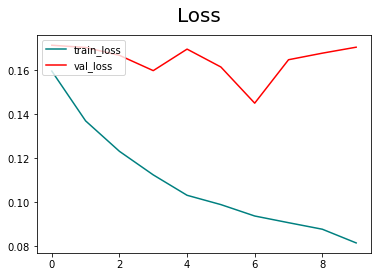

In [197]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='train_loss')
plt.plot(hist.history['val_loss'], color ='red', label ='val_loss')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

# Evaluate on the test dataset

In [198]:
class_names= label_binarizer.inverse_transform(np.identity(5))

def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [199]:
# mesure efficiency
preds_labels =  model.predict(X_test)
preds_labels = label_binarizer.inverse_transform(preds_labels)

1457/1457 [==============================] - 6s 4ms/step


In [200]:
true_labels = label_binarizer.inverse_transform(y_test)


normalized confusion matrix


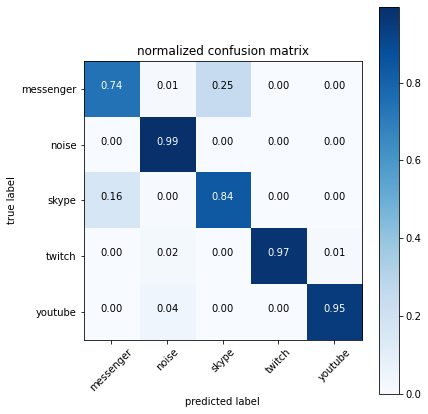

In [201]:
 


# compute confusion matrix
cnf_matrix = confusion_matrix(true_labels,preds_labels)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='normalized confusion matrix')

plt.show()

# Evaluate on the whole dataset

In [202]:
# mesure efficiency
preds_labels =  model.predict(TBS_values)
preds_labels = label_binarizer.inverse_transform(preds_labels)

9708/9708 [==============================] - 10848s 1s/step


In [203]:

true_labels = label_binarizer.inverse_transform(label_one_hot_encoded)


normalized confusion matrix


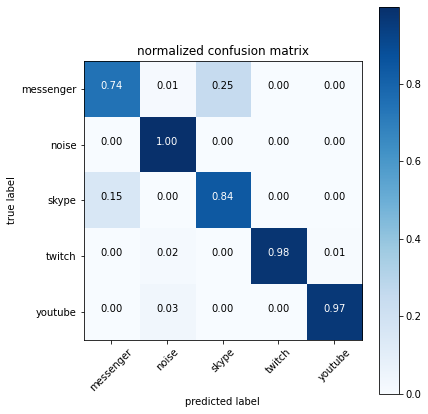

In [204]:
# compute confusion matrix
cnf_matrix = confusion_matrix(true_labels,preds_labels)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='normalized confusion matrix')

plt.show()